# Modeling Wine Quality: A Statistical Analysis

In this project, I focused on conducting statistical modeling using Python, aiming to build reliable models for regression and classification tasks.  

The dataset used in this project is the **Red Wine Quality dataset**, which contains 12 attributes describing different characteristics of red wine. The goal is not just to create predictive models but to develop an **explanatory model** that helps us understand which factors most significantly influence wine quality and alcohol levels.  

### **Project Problem**  

Wine quality is influenced by numerous factors, but identifying the key attributes that determine its perceived quality and alcohol content can be challenging. Understanding these relationships can provide valuable insights for winemakers and consumers alike.  

### **Proposed Solution**  

By applying **Exploratory Data Analysis (EDA)** and **statistical modeling techniques**, this project aims to:  
- Identify key variables that impact wine quality.  
- Examine relationships between wine attributes and alcohol levels.  
- Develop a linear regression model to explain the most influential factors.  

This study will focus on interpreting model coefficients and evaluating their statistical significance rather than purely optimizing predictive accuracy.

### **Project Approach & Objectives**  

This project follows a structured, step-by-step methodology rooted in data science best practices. Each phase is carefully designed to build on the previous one, ensuring a well-rounded and insightful analysis:  

1. **Understanding the Data** 
2. **Data Preprocessing** 
3. **Exploratory Data Analysis (EDA)** 
4. **Hypothesis Testing**
5. **Predictive Modeling**

### **Standards and Assumptions**  

In this project, specific statistical standards and assumptions are established to ensure a structured and reliable analysis:
1. **Focus on Key Variables:**  
   - The analysis will primarily focus on wine quality and alcohol content, as these are the key variables of interest. Considering the more the alcohol content the more the quality. 
2. **Assumption of Normality (Central Limit Theorem):**  
   - Given the large sample size, the Central Limit Theorem (CLT) allows us to assume that sampling distributions of the mean approximate normality, making statistical inference more robust.  
3. **Confidence Level and Statistical Significance:**  
   - All statistical tests will be conducted at a 95% confidence level, meaning results will be considered statistically significant if the p-value < 0.05 (α = 0.05). 
4. **Handling of Data and Assumptions:**  
   - The dataset is assumed to be representative of general wine quality attributes.  
   - Multicollinearity issues will be addressed by removing or adjusting highly correlated variables.  
   - Outliers will be reviewed but not necessarily removed unless they significantly impact model performance.  
5. **Scope of Modeling Techniques:**  
   - This project follows a structured approach based on foundational statistical modeling principles.  

### **Key Statistical Concepts & Assumptions**  

This project applies essential statistical concepts to ensure accurate analysis and interpretation:  

- **Central Limit Theorem (CLT):** Sample means follow a normal distribution as sample size increases, enabling reliable inference.  
- **Multicollinearity:** High correlation between independent variables can distort regression estimates (checked using VIF, where VIF > 4 indicates issues).  
- **Homoskedasticity:** Residuals should have constant variance across all levels of predictors.  
- **R-Squared:** Measures the proportion of explained variance in the dependent variable, with higher values indicating better model fit.  
- **Standard Deviation & Standard Error:** Quantify data variability and uncertainty in parameter estimates.  

### **Linear Regression Assumptions:**  
For a valid regression model:  
1. **Linearity:** A linear relationship must exist between independent and dependent variables.  
2. **No Multicollinearity:** Independent variables should be uncorrelated.  
3. **Residuals Mean ≈ 0:** Ensures unbiased predictions.  
4. **Residuals Normally Distributed:** Verified through Q-Q plots.  
5. **Constant Residual Variance (Homoskedasticity)**

### **Criteria for a Good Model Fit:**  
- **R-squared ≥ 0.20** (at least 20% variance explained).  
- **P-values < 0.05** for all predictor variables.  
- **No major assumption violations.**  

# Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import statsmodels.api as sm
import scipy.stats.distributions as dist
import warnings
import re
import pathlib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("winequality-red.csv")

## Understanding Data

In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1599, 12)


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
print("Dataset Summary:")
df.describe()

Dataset Summary:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
def summary(df):    
    summ = pd.DataFrame({
        'Column Name': df.columns,
        '#Unique': df.nunique().values,
        'Missing Values': df.isna().sum().values
    })
    
    return summ

summary(df)

,Column Name,#Unique,Missing Values
0,fixed acidity,96,0
1,volatile acidity,143,0
2,citric acid,80,0
3,residual sugar,91,0
4,chlorides,153,0
5,free sulfur dioxide,60,0
6,total sulfur dioxide,144,0
7,density,436,0
8,pH,89,0
9,sulphates,96,0


Here are the initial insights on the features:  

- All features are numeric, except for quality, which is an ordinal categorical feature. None of the features contain null values.  
- Free sulfur dioxide and total sulfur dioxide exhibit high standard deviations, which could pose challenges when building statistically significant models.  
- Density, pH, and chlorides have very low standard deviations and appear to follow symmetric distributions.

## Data Cleaning

In [8]:
df1 = df.copy()

In [9]:
df.duplicated().sum()

240

In [10]:
df[df.duplicated(keep=False)].head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
22,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5


In [11]:
df = df.drop_duplicates()

In [12]:
df1.shape

(1599, 12)

In [13]:
df.shape

(1359, 12)

#### We've dropped 240 rows because they were duplicated. Sample Size for this dataset will be 1359 observations and 12 attributes.

# Exploratory Data Analysis

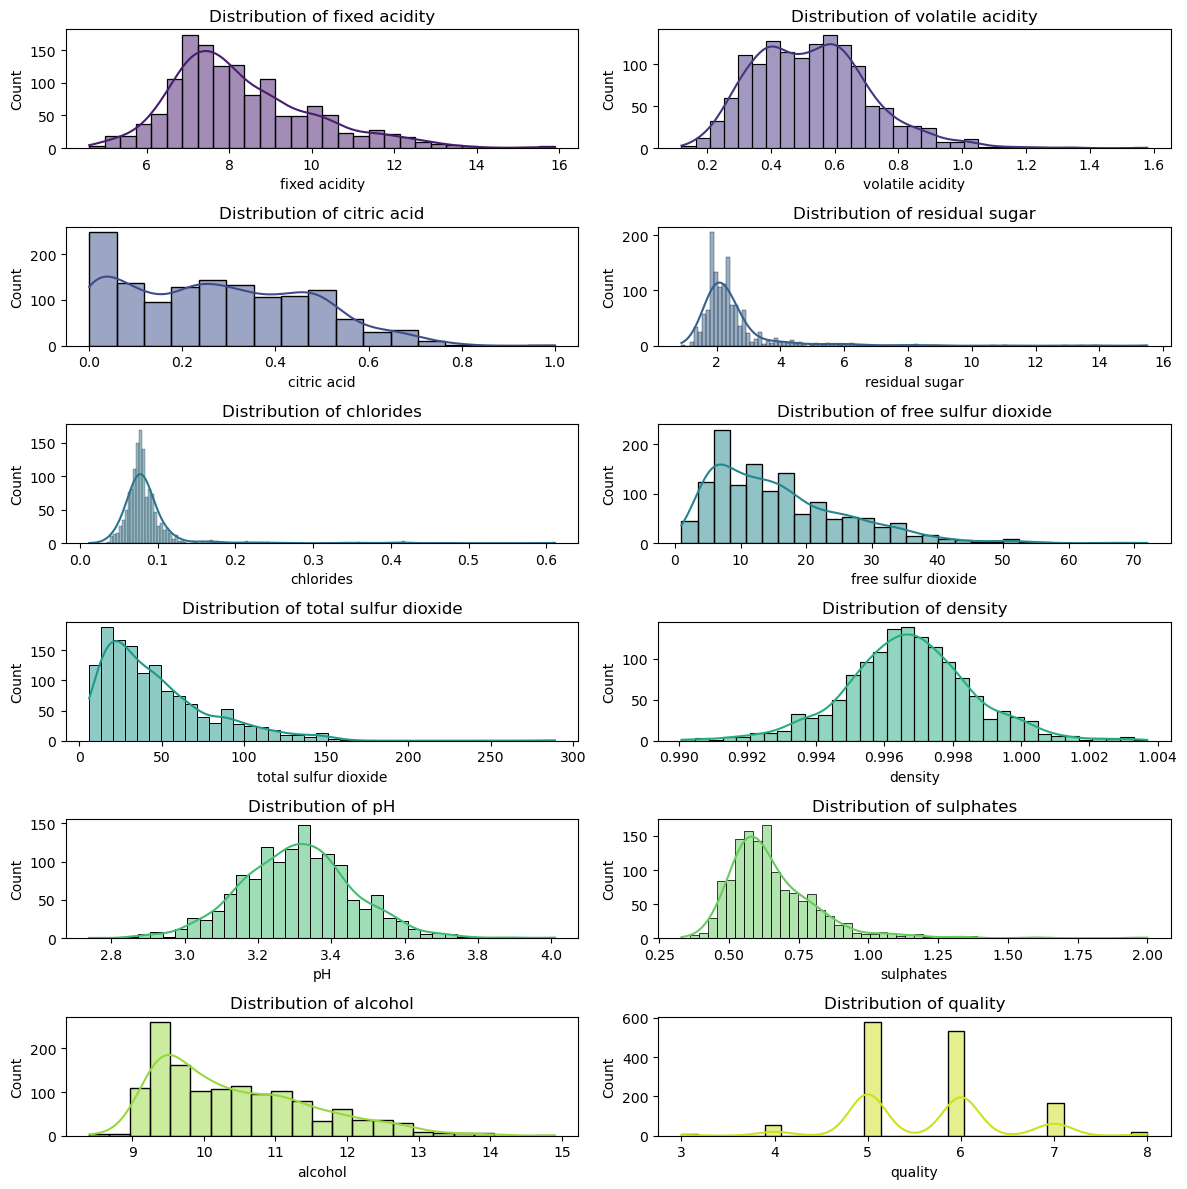

In [14]:
num_columns = len(df.columns)

num_rows = (num_columns + 1) // 2  

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 2 * num_rows))

axes = axes.flatten()
colors = sns.color_palette('viridis', num_columns)
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(data=df, x=column, ax=ax, kde=True, color=colors[i])
    ax.set_title(f'Distribution of {column}')

plt.tight_layout()

plt.show()

### Data Distribution and Normality Testing

Upon examining the histograms of the features, we observe that many of them exhibit a **right-skewed distribution**, while some appear to be **normally distributed**. This suggests that, for the right-skewed features, most data points are concentrated closer to the minimum value, with fewer points near the maximum within their respective intervals.

While it is rare to find perfectly normally distributed features in real-life data, we can use statistical tests to assess whether any of the features in our dataset follow a normal (Gaussian) distribution. One such test is the **Jarque-Bera test**.

#### **Jarque-Bera Test**
The **Jarque-Bera test** is a statistical test that checks whether the data follows a normal distribution. It is based on the skewness and kurtosis of the data:

- **Skewness** measures the asymmetry of the distribution. For a normal distribution, the skewness should be close to zero.
- **Kurtosis** measures the "tailedness" of the distribution. A normal distribution has a kurtosis of 3, but the test uses excess kurtosis, which should be close to zero for a normal distribution.

The **Jarque-Bera test statistic** is computed from these two metrics. A large test statistic indicates a deviation from normality, while a smaller statistic suggests that the data may be normally distributed.

Let's perform the **Jarque-Bera test** for each feature in our dataset and evaluate whether any features are normally distributed.

We will calculate the **Jarque-Bera test statistic** and its corresponding **p-value** to assess normality. If the p-value is small (typically less than 0.05), it indicates that the feature deviates significantly from a normal distribution.

In [15]:
for column in df.columns:
    jb_stat = sm.stats.jarque_bera(df[column])
    print(f'Feature: {column}')
    print(f'Jarque-Bera Test Statistic: {jb_stat[0]:.2f}')
    print(f'p-value: {jb_stat[1]:.4f}')
    print('-' * 30)

Feature: fixed acidity
Jarque-Bera Test Statistic: 261.55
p-value: 0.0000
------------------------------
Feature: volatile acidity
Jarque-Bera Test Statistic: 207.30
p-value: 0.0000
------------------------------
Feature: citric acid
Jarque-Bera Test Statistic: 57.48
p-value: 0.0000
------------------------------
Feature: residual sugar
Jarque-Bera Test Statistic: 53128.66
p-value: 0.0000
------------------------------
Feature: chlorides
Jarque-Bera Test Statistic: 90680.42
p-value: 0.0000
------------------------------
Feature: free sulfur dioxide
Jarque-Bera Test Statistic: 540.43
p-value: 0.0000
------------------------------
Feature: total sulfur dioxide
Jarque-Bera Test Statistic: 1452.68
p-value: 0.0000
------------------------------
Feature: density
Jarque-Bera Test Statistic: 38.82
p-value: 0.0000
------------------------------
Feature: pH
Jarque-Bera Test Statistic: 55.24
p-value: 0.0000
------------------------------
Feature: sulphates
Jarque-Bera Test Statistic: 8231.72
p-va

The results of the **Jarque-Bera test** indicate that none of the features in the dataset follow a normal distribution. Based on the p-values from the test, we **fail to reject the null hypothesis** for all features.

Now let's take a look at the Q-Q plots to investigate each feature:

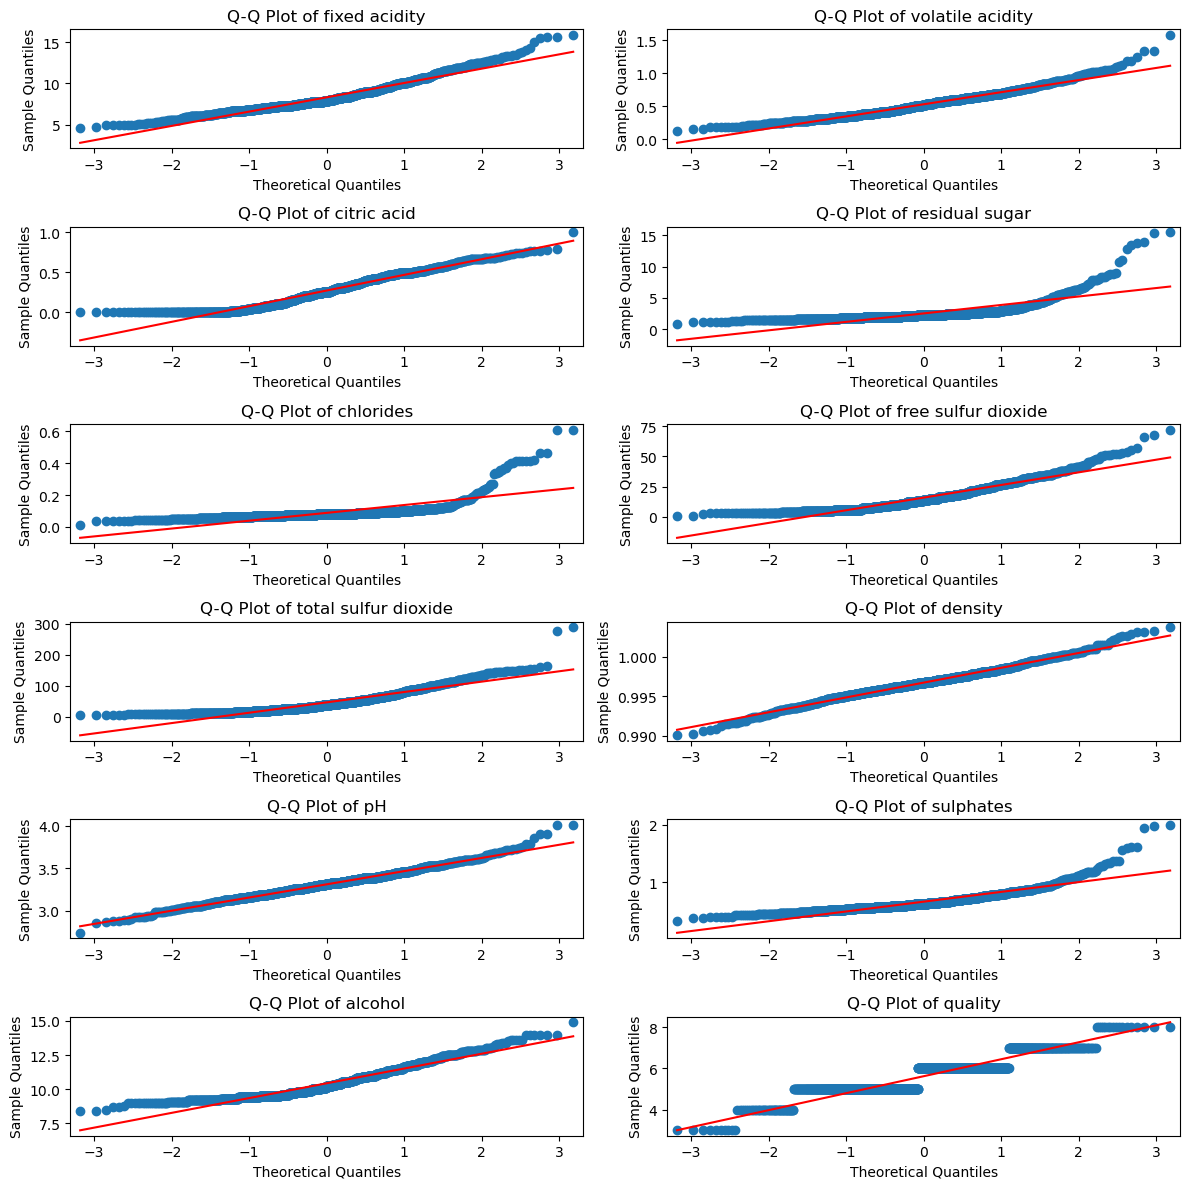

In [16]:
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 2 * num_rows))

axes = axes.flatten()
colors = sns.color_palette('viridis', num_columns)

for i, column in enumerate(df.columns):
    ax = axes[i]
    
    # Create a Q-Q plot
    sm.qqplot(df[column], line='s', ax=ax)
    ax.set_title(f'Q-Q Plot of {column}')
    
plt.tight_layout()
plt.show()

In real-life projects, especially when working with econometric or medical data, it is often useful to apply transformations to features in order to improve the model's performance or meet the assumptions of statistical tests.

However, in this case, since all the features are **nearly normally distributed**, no feature transformations will be applied. The data's distribution already aligns closely with the normal distribution, so transforming the features is unnecessary at this point.

### Analysis of Linear Relationships Between Features

One of the key assumptions in linear regression is that there exists a **linear relationship** between the dependent and independent variables. To validate this assumption, we can visualize the relationship by creating a scatter plot and overlaying a **regression line**. This will help us assess whether the data points follow a linear pattern, which is essential for the effectiveness of linear regression models.

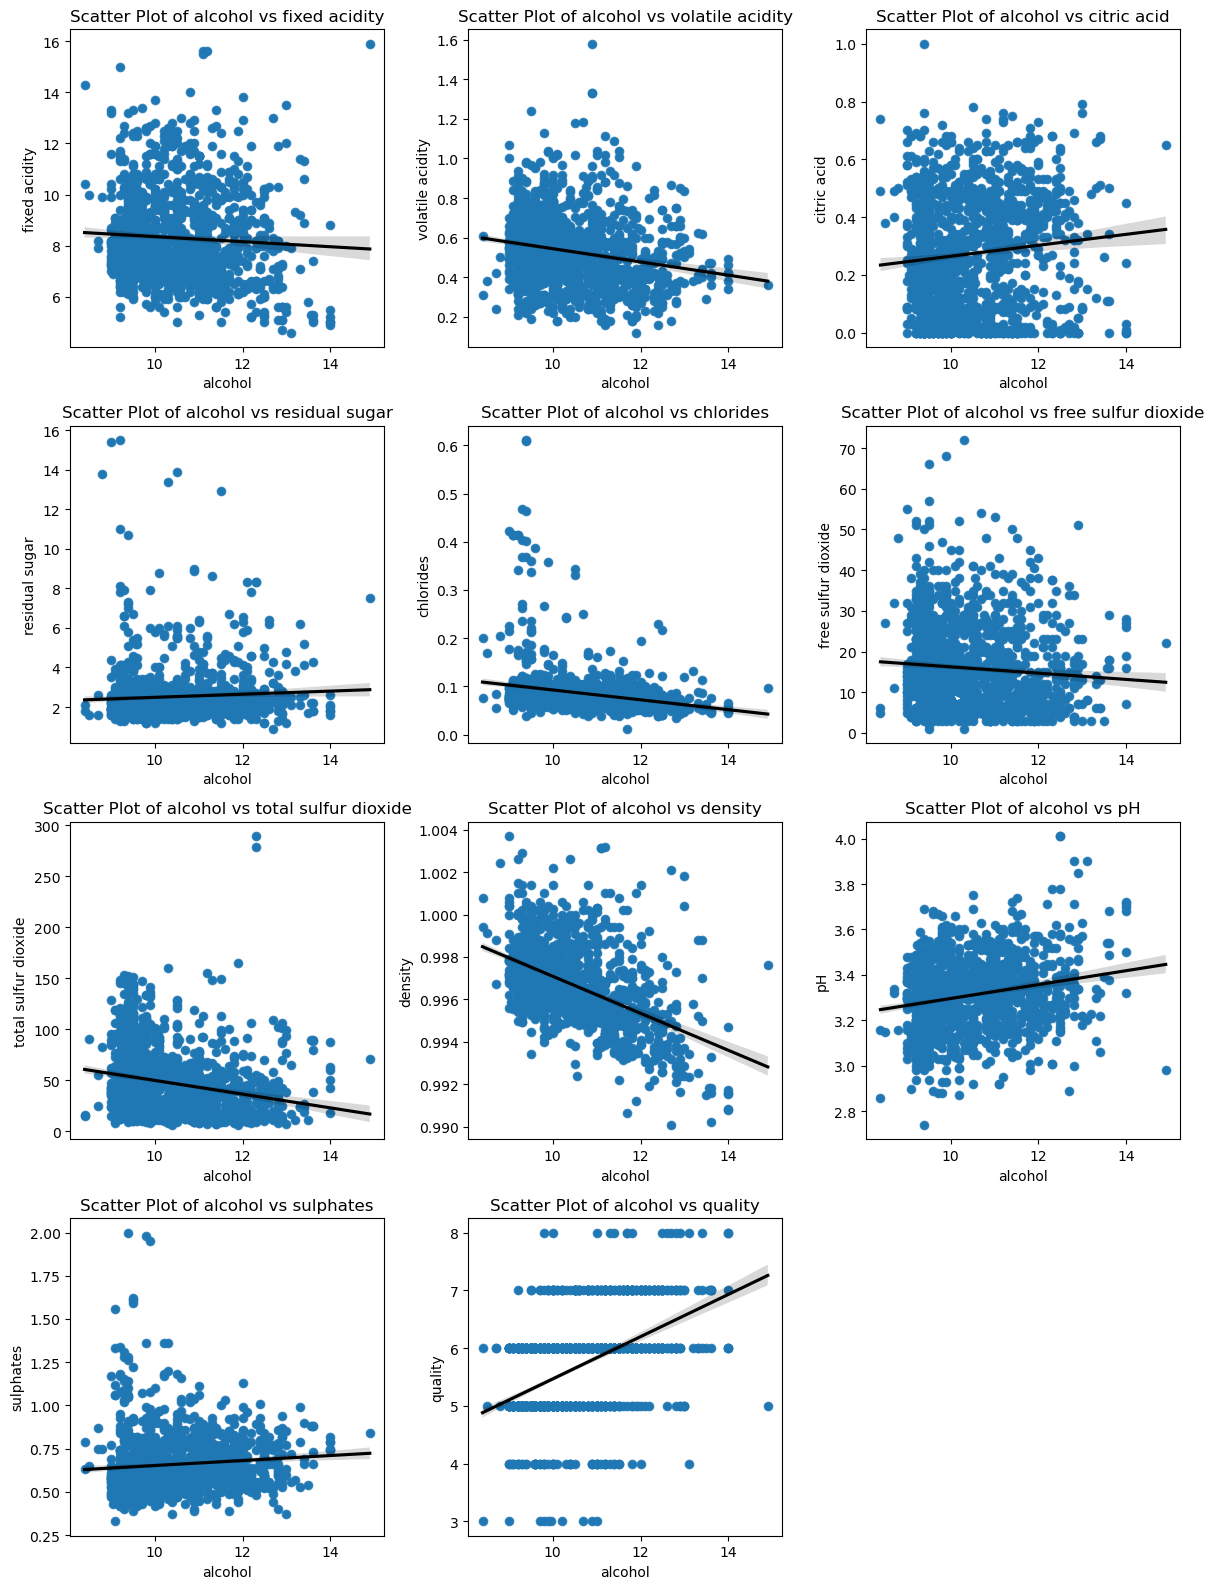

In [17]:
other_columns = [col for col in df.columns if col != 'alcohol']

fig, axes = plt.subplots(4, 3, figsize=(12, 16))

axes = axes.flatten()

for i, col in enumerate(other_columns):
    if i < num_rows * num_columns:
        row = i // num_columns
        col = i % num_columns
        sns.scatterplot(data=df, x='alcohol', y=other_columns[i], ax=axes[i])
        sns.regplot(data=df, x='alcohol', y=other_columns[i], ax=axes[i], line_kws={'color': 'black'})
        axes[i].set_title(f'Scatter Plot of alcohol vs {other_columns[i]}')

if len(other_columns) < len(axes):
    for j in range(len(other_columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Upon examining the relationships between potential predictors and the dependent variable, we find that features like **sulphates**, **fixed acidity**, **residual sugar**, and **free sulfur dioxide** do not exhibit a linear relationship with the dependent variable. 

At this stage, it's important to evaluate the **correlations** between the predictor variables and the dependent feature, as well as the correlations among the predictor variables themselves. This will provide valuable insights into which features are most relevant for the linear regression model, helping us make more informed decisions during feature selection.

#### Interpretation of the Correlation Coefficients:
- **r < 0.3**: Very weak correlation
- **0.3 ≤ |r| < 0.5**: Weak correlation
- **0.5 ≤ |r| < 0.7**: Average correlation
- **0.7 ≤ |r| < 0.9**: Strong correlation
- **0.9 ≤ |r| ≤ 1**: Very strong correlation

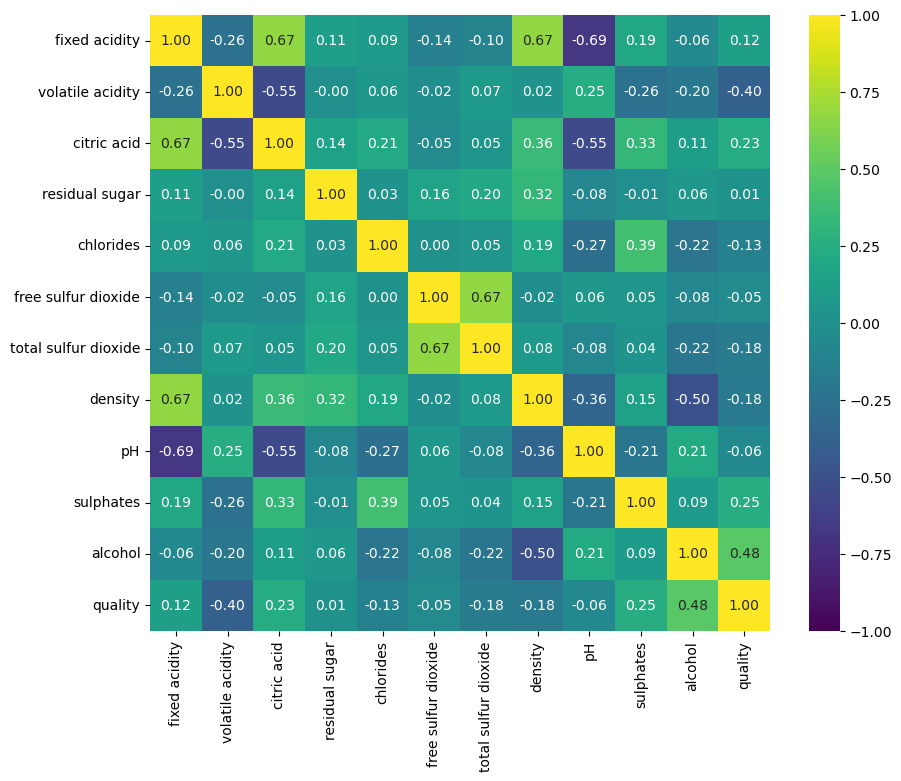

In [18]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, cmap="viridis", annot=True, fmt=".2f", vmin=-1, vmax=1)

plt.show()


Upon analysis, we find that **almost half of the features** in the dataset are weakly correlated with the target variable, **except for** the following features: **quality**, **pH**, **density**, **total sulfur dioxide**, **chlorides**, and **volatile acidity**. These exceptions demonstrate stronger correlations, making them potentially more relevant predictors for the target variable in our model.

In [19]:
df.corr()['alcohol'].sort_values(ascending=False)

alcohol                 1.000000
quality                 0.480343
pH                      0.213418
citric acid             0.105108
sulphates               0.091621
residual sugar          0.063281
fixed acidity          -0.061596
free sulfur dioxide    -0.080125
volatile acidity       -0.197812
total sulfur dioxide   -0.217829
chlorides              -0.223824
density                -0.504995
Name: alcohol, dtype: float64

There is a possibility of **multicollinearity** between the following pairs of features, as they exhibit the highest correlation coefficients:
- **Fixed acidity** and **pH**
- **Fixed acidity** and **citric acid**
- **Fixed acidity** and **density**
- **Free sulfur dioxide** and **total sulfur dioxide**

#### Conclusion:
Given the high correlation between these features, it's likely that **half of the features** may not contribute significantly to the model due to multicollinearity. To ensure the model's effectiveness, it is essential to conduct a further check for multicollinearity between the previously mentioned features.

### Analysis of Multicollinearity

To assess potential **multicollinearity** among the features, we will calculate the **Variance Inflation Factor** (VIF). The VIF measures how much the variance of a regression coefficient is inflated due to collinearity with other features. 

A VIF value greater than 4 indicates a high degree of multicollinearity, which may suggest that the feature is highly correlated with others and could potentially be removed to improve model performance. Therefore, a **VIF ≤ 4** will be considered acceptable for our analysis.

Let's proceed by calculating the VIF for each feature.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_predictors = df.drop(columns=['alcohol'])

X = sm.add_constant(numeric_predictors)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                Variable            VIF
0                  const  799036.037807
1          fixed acidity       5.667295
2       volatile acidity       1.848316
3            citric acid       3.072179
4         residual sugar       1.258784
5              chlorides       1.547892
6    free sulfur dioxide       1.951399
7   total sulfur dioxide       2.227516
8                density       2.914046
9                     pH       2.492248
10             sulphates       1.444479
11               quality       1.465693


The **(VIF)** analysis reveals that **fixed acidity** may indeed cause multicollinearity issues, as its VIF score exceeds 4. As a result, **fixed acidity** will not be included in the regression model to avoid potential issues with multicollinearity and to ensure more reliable model results.

## Outlier detection and analysis.

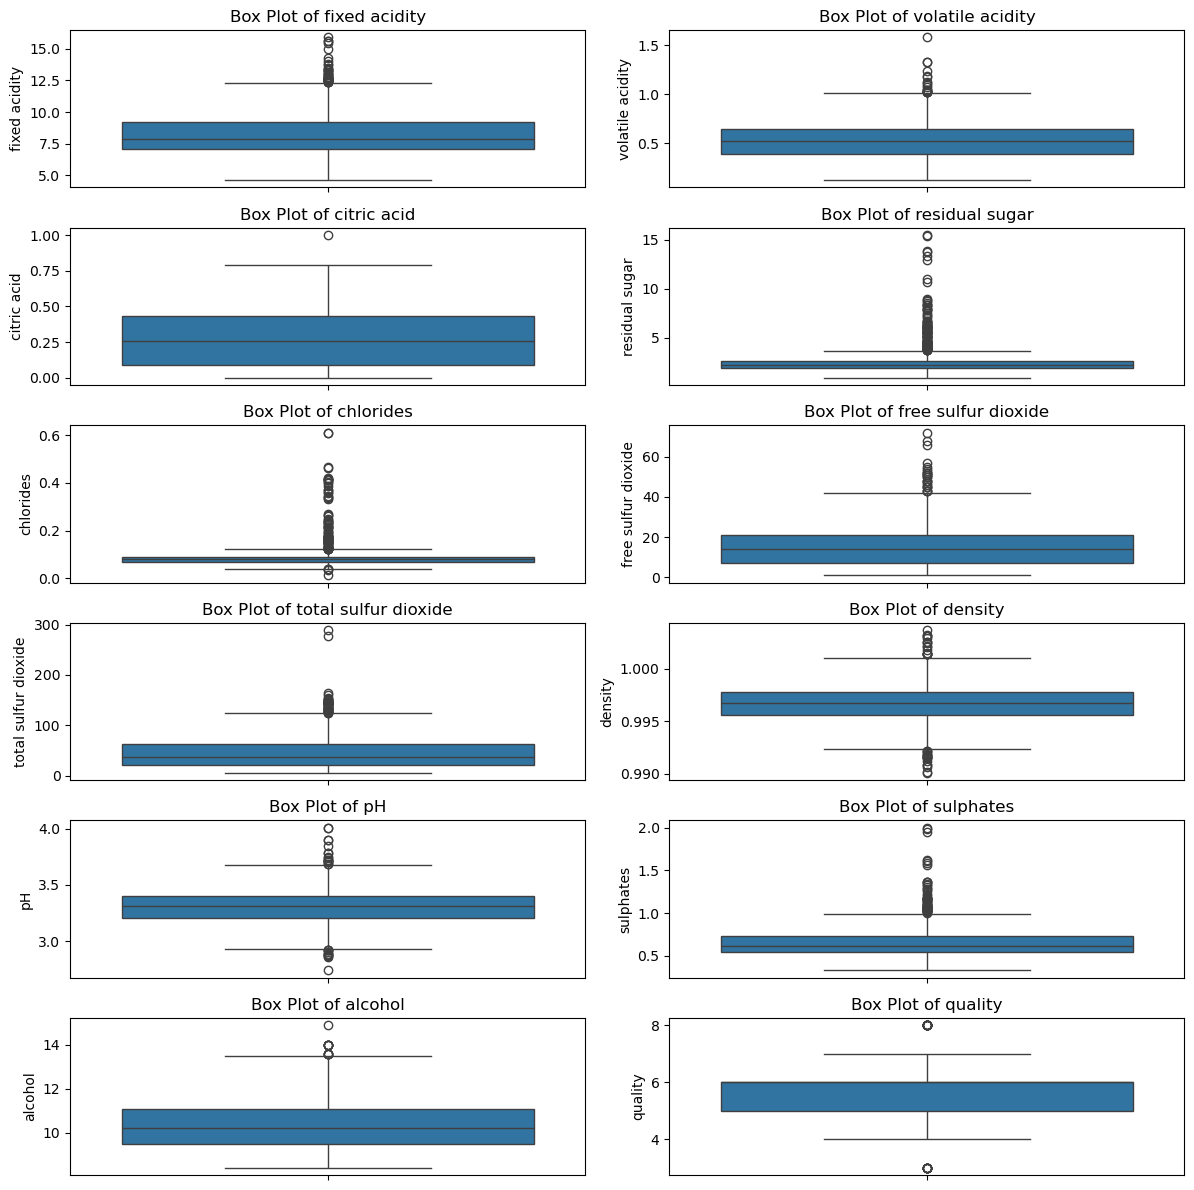

In [21]:
fig, axes = plt.subplots(6, 2, figsize=(12, 12))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.boxplot(data=df, y=column, ax=ax)
    ax.set_title(f'Box Plot of {column}')

plt.tight_layout()

plt.show()

Features such as **residual sugar**, **chlorides**, and **total sulfur dioxide** contain data points that exceed the upper whisker limits by more than 3 times, indicating the presence of **outliers**. However, it is important to note that these outliers may represent **extreme characteristics** of the data rather than errors in data entry.

Given that these extreme values might be valid and relevant, we will **retain the outliers** in the dataset for modeling purposes.

In [22]:
# For experimentation purposes let's create a copy of a dataframe without mentioned features.

df_copy2 = df.drop(columns=['residual sugar', 'chlorides', 'total sulfur dioxide', 'fixed acidity'])
df_copy2.head(5)

,volatile acidity,citric acid,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,11.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.00,25.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.04,15.0,0.9970,3.26,0.65,9.8,5
3,0.28,0.56,17.0,0.9980,3.16,0.58,9.8,6
5,0.66,0.00,13.0,0.9978,3.51,0.56,9.4,5


## Linear Regression models.

In [23]:
df1 = df.drop(columns=['fixed acidity'], axis=1)
df1.head(5)

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


### Significance of Individual Predictors in Linear Regression

To assess whether the **Linear Regression Model** is well-designed, it's crucial to evaluate the significance of individual predictors. This can be done by examining the **t-values** for the regression coefficients, which are derived from the **Student's t-test**.

#### Hypothesis Testing:

- **Target Population**: Individual features in the Wine Quality dataset.
- **Parameter of Interest**: The value of the **t-statistic** for each regression coefficient.

#### Hypotheses:

- **Null Hypothesis (H₀)**: If the **p-value** > 0.05, the predictor has **no significant effect** on the dependent variable (i.e., the coefficient is not statistically significant).
  
- **Alternative Hypothesis (H₁)**: If the **p-value** < 0.05, the predictor has a **significant effect** on the dependent variable (i.e., the coefficient is statistically significant).

In [24]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df1.drop(columns=['alcohol'], axis=1)
X = sm.add_constant(X)
y = df1['alcohol']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit OLS model on training data
lr1 = sm.OLS(y_train, X_train).fit()

print(lr1.summary())

y_pred = lr1.predict(X_test)

# Evaluate model performance on test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest Set Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     155.0
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          1.37e-200
Time:                        12:47:20   Log-Likelihood:                -1151.9
No. Observations:                1087   AIC:                             2326.
Df Residuals:                    1076   BIC:                             2381.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  349.5087 

#### **Insights of the model**:
- The t-tests show that features like **density, citric acid, residual sugar, and alcohol** have a statistically significant impact on wine quality (p-value < 0.05).
- **Free Sulfur Dioxide** does not show significance and was found to be redundant due to its correlation with Total Sulfur Dioxide.
- The overall model is statistically significant (F-statistic p-value < 0.05), indicating that at least some predictors contribute meaningfully to wine quality.

In [25]:
X = df1.drop(columns=['alcohol', 'free sulfur dioxide'], axis=1)
X = sm.add_constant(X)  # Adding constant for OLS
y = df1['alcohol']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr1 = sm.OLS(y_train, X_train).fit()

print(lr1.summary())

y_pred = lr1.predict(X_test)

# Evaluate model performance on test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest Set Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     172.1
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          1.72e-201
Time:                        12:47:20   Log-Likelihood:                -1152.5
No. Observations:                1087   AIC:                             2325.
Df Residuals:                    1077   BIC:                             2375.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  349.4856 

**Insights of the Model:**  
- For all instances, we can reject the null hypothesis and confirm that most features are significantly contributing to the model.  
- The removal of the free sulfur dioxide feature did not impact the model's accuracy, confirming its redundancy due to correlation with total sulfur dioxide.  
- The model accuracy remains acceptable, and the low F-statistic probability indicates that the model is overall statistically significant.  
- Key features like density, citric acid, residual sugar, and quality continue to have the largest and most significant impact on predicting the alcohol content.

### Checking Assumptions of the Linear Regression Model

Although the **R-squared** value has not changed significantly, it is crucial to verify whether the assumptions of **Linear Regression** hold. The key assumptions to check include:

1. **Independence of Residuals**: The residuals should have a **mean of zero**, indicating that they are not systematically biased.
2. **Normality of Residuals**: The residuals should follow a **normal distribution**, which ensures valid statistical inference.
3. **Homoskedasticity**: The residuals should exhibit **constant variance** across all levels of the independent variables (i.e., no heteroskedasticity).

Next, we will perform diagnostic checks to validate these assumptions.


### Independence of Residuals & Homoskedasticity

To assess the **independence of residuals** and **homoskedasticity**, we will analyze a scatterplot of **residuals vs. predicted values**.

- **Independence of Residuals**: Residuals should be **randomly scattered** around **y = 0** without any clear pattern.
- **Homoskedasticity**: Residuals should maintain a **constant spread** across all predicted values, indicating no heteroskedasticity.

A well-behaved residual plot should show **no discernible structure**, confirming that these assumptions hold.


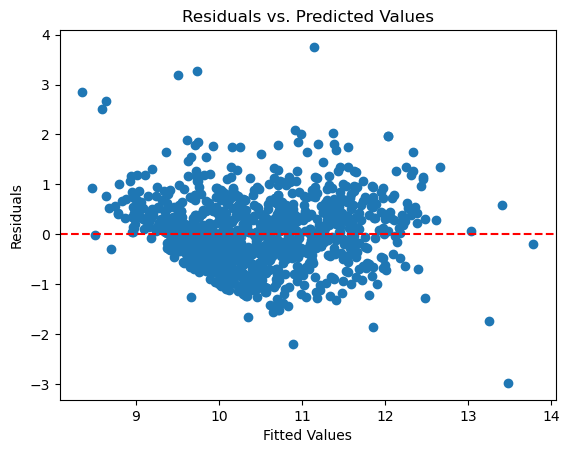

In [26]:
residuals = lr1.resid

plt.scatter(lr1.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Conclusion

- **Residual Independence**: The residuals appear to be **randomly scattered around zero**, indicating independence. Additionally, the **Durbin-Watson test statistic (1.66)** confirms that there is **no significant autocorrelation** in the residuals.
- **Homoskedasticity**: The residuals are **evenly distributed** around both the **X and Y axes**, except for a few outliers, suggesting that the assumption of **constant variance** holds.


### Normality of Residuals

To assess whether the residuals follow a **normal distribution**, we will analyze:

- **Histogram**: This helps visualize the overall shape of the residuals and check for skewness or deviations from normality.
- **Q-Q Plot (Quantile-Quantile Plot)**: This compares the residuals to a theoretical normal distribution. If the points lie along the diagonal line, the residuals are approximately normal.


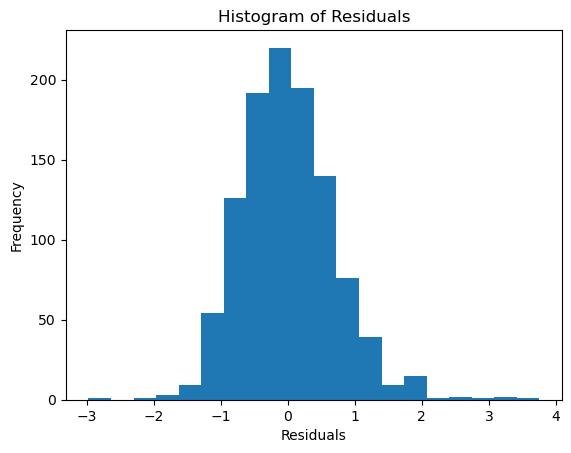

In [27]:
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

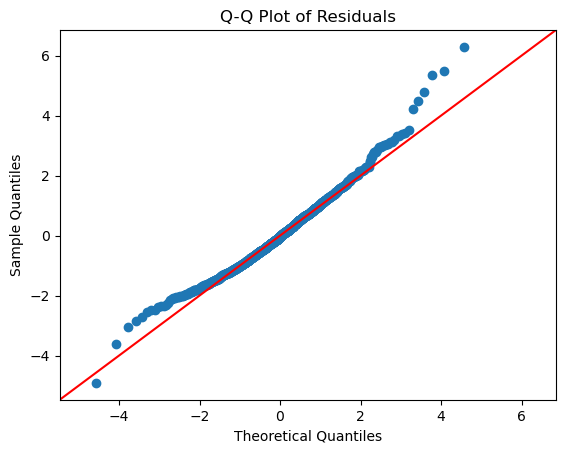

In [28]:
sm.qqplot(residuals, stats.t, fit=True, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

The residuals show a **slight deviation from normality**. However, given the **large sample size**, this assumption can be reasonably overlooked without significantly impacting the model's validity.

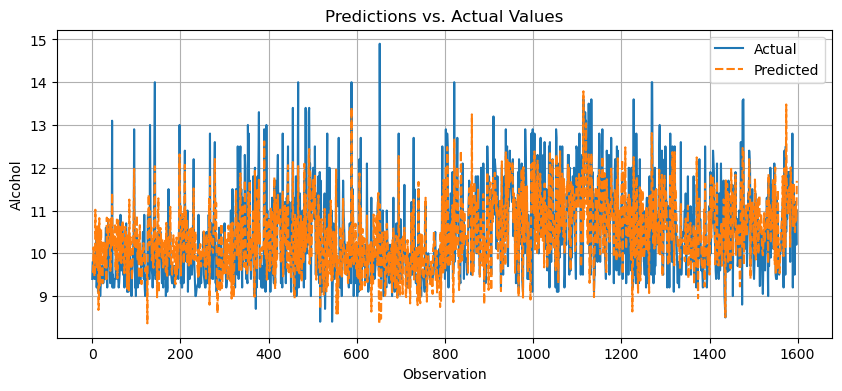

In [29]:
predicted_values = lr1.predict(X)

plt.figure(figsize=(10, 4))
sns.lineplot(data=pd.DataFrame({'Actual': y, 'Predicted': predicted_values}))
plt.xlabel('Observation')
plt.ylabel('Alcohol')
plt.title('Predictions vs. Actual Values')
plt.grid(True)
plt.show()

### Overall Conclusion

The **Multiple Linear Regression model** is **significant** with an **accuracy of 59%**. While the residuals show a slight deviation from normality, the **large sample size** allows this assumption to be overlooked. Additionally, all other key assumptions of **linear regression** are satisfied, supporting the model's validity.

### Final Linear Regression Model Equation  

The final **Multiple Linear Regression Model** is given by:  

alcohol = 347.1524 + 0.9421 * volatile acidity + 2.3237 * citric acid + 0.2035 * residual sugar - 3.7665 * chlorides - 0.0062 * total sulfur dioxide - 345.8698 * density + 1.3683 * pH + 0.8827 * sulphates + 0.3336 * quality

This equation defines the relationship between the **predictor variables** and the **alcohol content** in the dataset.

### Special Case for Linear Regression

For exploration purposes, let's examine what would have happened if we had kept all the original features in the model i.e., the original dataset without removing duplicates.

In [30]:
X1 = df.drop(columns=['alcohol'], axis=1)
X1 = sm.add_constant(X1)  # Adding constant for OLS
y1 = df1['alcohol']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

lr2 = sm.OLS(y_train, X_train).fit()

print(lr2.summary())

y_pred = lr2.predict(X_test)

# Evaluate model performance on test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest Set Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     236.5
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          7.53e-278
Time:                        12:47:20   Log-Likelihood:                -968.63
No. Observations:                1087   AIC:                             1961.
Df Residuals:                    1075   BIC:                             2021.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  573.6491 

In [31]:
vif = pd.DataFrame()
vif["Variable"] = X1.columns
vif["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]

print(vif)

                Variable            VIF
0                  const  799036.037807
1          fixed acidity       5.667295
2       volatile acidity       1.848316
3            citric acid       3.072179
4         residual sugar       1.258784
5              chlorides       1.547892
6    free sulfur dioxide       1.951399
7   total sulfur dioxide       2.227516
8                density       2.914046
9                     pH       2.492248
10             sulphates       1.444479
11               quality       1.465693


It appears that including the **Fixed Acidity** feature introduced **multicollinearity issues**, and two additional features were also found to be **insignificant**. However, it's worth noting that the **R-squared** value increased to **0.70**, indicating an improved ratio of explained variance.

Overall, choosing to proceed with a **stable and reliable** model, even though it is **slightly less accurate**, was the right decision.

## Binary Classification.

In this section, the analysis will focus on the **quality** feature, which is of an ordinal categorical nature. Before proceeding with statistical modeling, it is important to explore how this feature relates to the other features. The goal is to ultimately build a reliable model for a **classification task**.

### Univariate Analysis (Quality Feature)

In [32]:
df.quality.describe()

count    1359.000000
mean        5.623252
std         0.823578
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

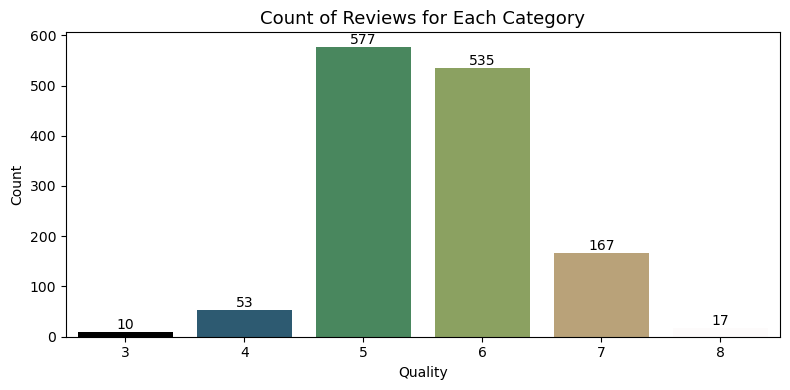

In [33]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x="quality", data=df, hue="quality", palette="gist_earth", legend=False)
plt.title("Count of Reviews for Each Category", fontsize=13)
plt.xlabel("Quality")
plt.ylabel("Count")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

### Key Conclusions:
- Approximately 75% of the wines have a quality rating of 6 or below.
- The average quality of wines is between 5 and 6.
- Only 1% of the wines are rated as the highest quality.

### Bivariate Analysis (Quality Feature)
Let's begin by analyzing the relationship between the wine quality and other features through bar plots.

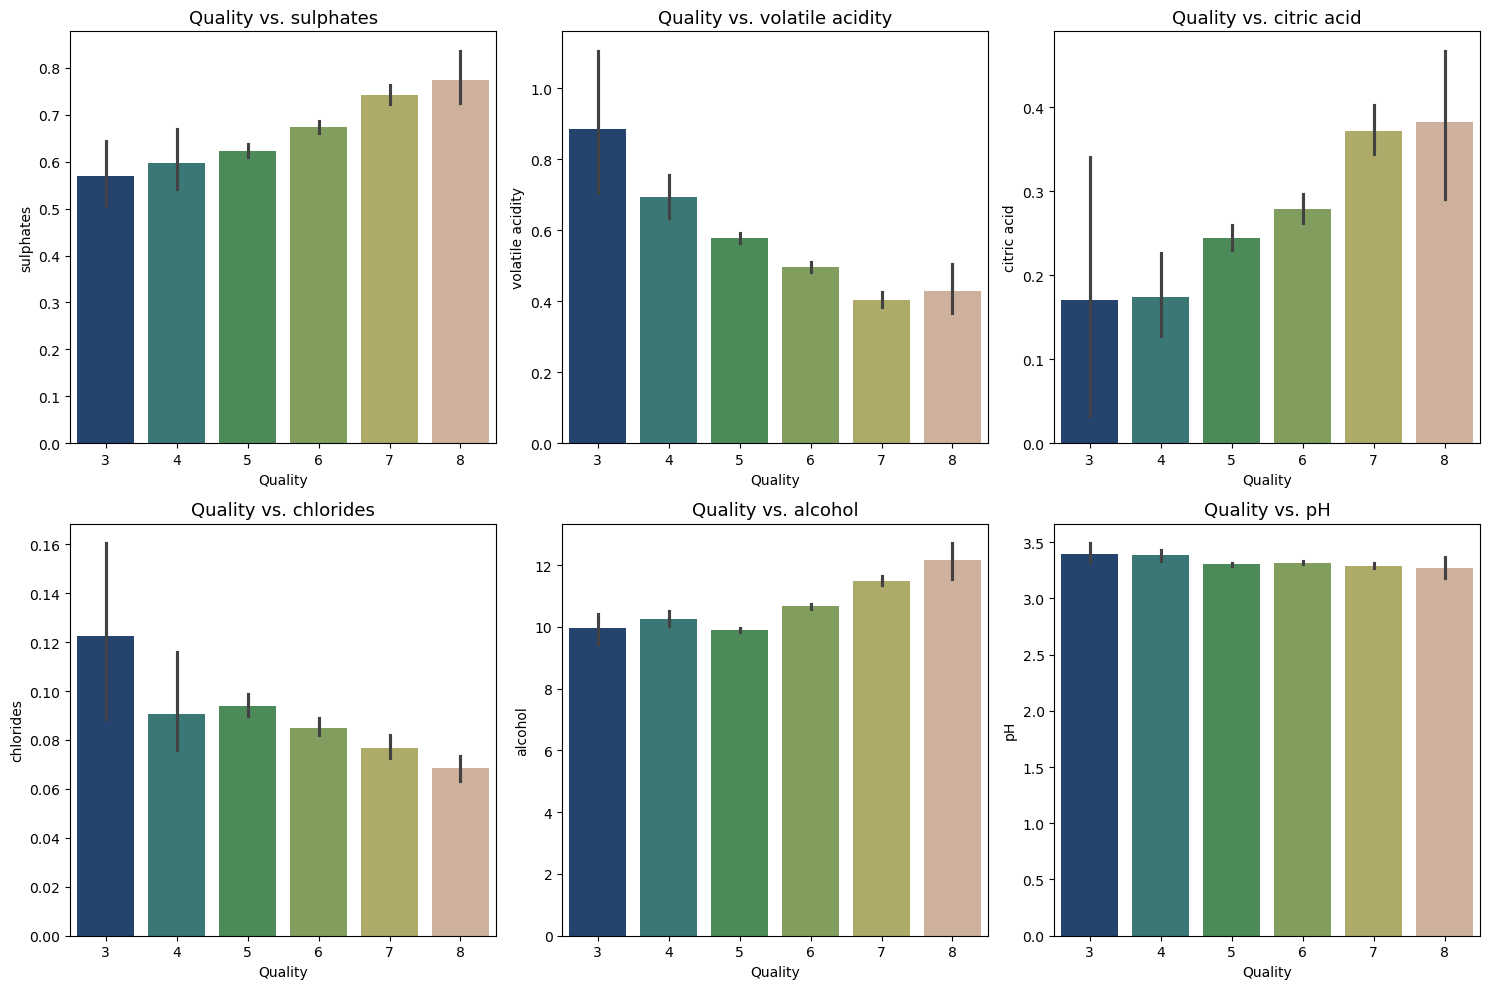

In [34]:
columns_to_plot = ['sulphates', 'volatile acidity', 'citric acid', 'chlorides', 'alcohol', 'pH']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, 3)
    sns.barplot(x='quality', y=column, data=df, ax=axes[row, col], palette="gist_earth", legend=False)
    axes[row, col].set_title(f"Quality vs. {column}", fontsize=13)
    axes[row, col].set_xlabel("Quality")
    axes[row, col].set_ylabel(column)

plt.tight_layout()

plt.show()

- **Quality** has a **positive correlation** with the amount of **sulphates**, **citric acid**, and **alcohol level**.
- **Quality** has a **negative correlation** with **volatile acidity**, **chlorides**, and **pH levels**.

Finally, let's take a look at the actual **correlation coefficients** between the **dependent** and **independent features**.

In [35]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

### Feature Engineering: Quality Classification  

At this stage, I am learning to implement **logistic regression** for a binary dependent variable. To do this, I need to determine a **threshold** for dividing the data into two categories. The **Wine Quality** feature will be categorized as **"Good"** or **"Poor."**  

A crucial consideration is ensuring that both classes have a sufficient amount of data for building a reliable model. If I were to classify only wines with a quality score of **7 and 8** as **"Good,"** this category would represent just **12% of the dataset,** which is insufficient.  

A general guideline is to ensure that at least **20% of the data** falls into one of the classes. Therefore, in this case, wines with a quality score of **6, 7, or 8** will be labeled as **"Good"** to maintain balance in the dataset.

In [36]:
df_log = df.copy()
df_log['quality_enc'] = df_log["quality"].replace({3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1})
df_log.drop('quality', axis=1, inplace=True)
df_log.quality_enc.value_counts()

quality_enc
1    719
0    640
Name: count, dtype: int64

### Logistic Regression Model  

Logistic regression is used when the **target variable is categorical**. Unlike linear regression, which predicts continuous values, logistic regression estimates the **log odds** of an event occurring. These log odds represent the probability of a particular category.  

Since the **fixed acidity** feature showed signs of **multicollinearity**, it will be excluded from the model to prevent redundancy and improve stability.  

To build the **Multiple Logistic Regression Model**, I will use the **scikit-learn** library, as logistic regression does not require an extensive analysis of assumptions.  

For model evaluation, the primary metrics will be the **classification report** and the **confusion matrix**. Instead of **R-squared**, which measures variance explained and is more relevant for regression models, we will use the **F1-score**, which balances **Precision** and **Recall**, providing a more suitable measure of classification performance.

**Precision:** TP/(TP+FP) (True Positives divided by the sum of True Positives and False Positives)  

**Recall:** TP/(TP+FN) (True Positives divided by the sum of True Positives and False Negatives)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [38]:
df_log.columns  # Ensure correct column names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_enc'],
      dtype='object')

In [39]:
X = df_log.drop(columns=['quality_enc', 'fixed acidity'], axis=1)
y = df_log['quality_enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       135
           1       0.74      0.77      0.75       137

    accuracy                           0.75       272
   macro avg       0.75      0.75      0.75       272
weighted avg       0.75      0.75      0.75       272

Accuracy Score: 0.7463235294117647


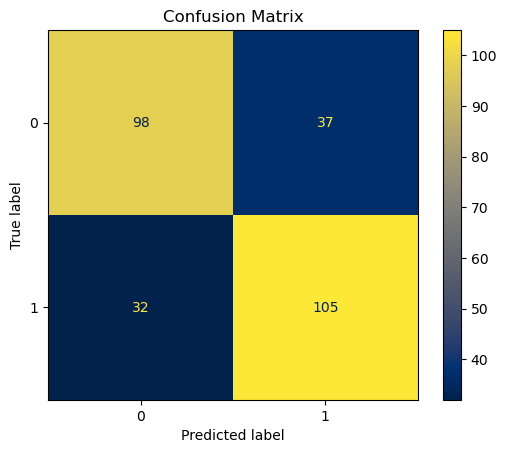

In [40]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='cividis')
plt.title('Confusion Matrix')
plt.show()

Interesting! The model performs almost equally well in distinguishing between the two classes, achieving a solid **74% accuracy** on the first attempt.  

Next, let's apply **feature scaling**. Scaling helps to reduce the impact of outliers by centering all values around the mean and normalizing them based on standard deviation. This ensures that all features contribute equally to the model, improving performance and stability.

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75       135
           1       0.75      0.78      0.77       137

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272

Accuracy Score: 0.7610294117647058


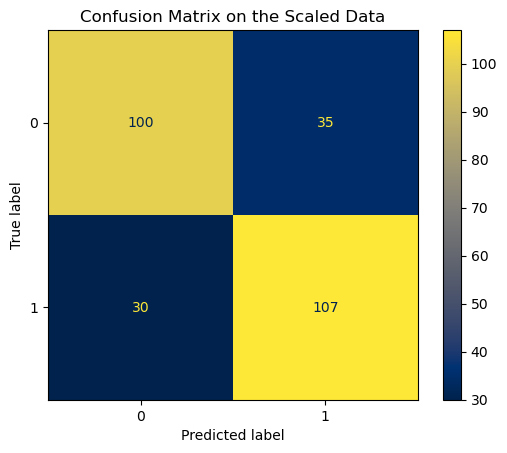

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(logistic_model, X_test_scaled, y_test, cmap='cividis')
plt.title("Confusion Matrix on the Scaled Data")
plt.show()

### **General Conclusions**  

- None of the attributes in the dataset follow a normal (Gaussian) distribution.  
- No regressors exhibit high or very high correlation with the target variables (alcohol, quality).  
- Due to multicollinearity issues, **Fixed Acidity** was excluded from predictive models.  
- Many attributes contain outliers, but these represent extreme values rather than data entry errors, so they were retained.  
- **Free Sulfur Dioxide** was removed from the Linear Regression model due to its insignificance.  
- Despite a slight violation of residual normality, all assumptions for linear regression were met, and the model achieved an **R-squared of 59%**.  
- **Feature scaling** improved the performance of the **Logistic Regression model**, achieving an **F1-score of 76%** for classification.  

## Future Improvements

- Expand the analysis by incorporating additional statistical tests to strengthen findings.  
- Integrate time-series analysis to study wine quality trends over time.  
- Conduct a comparative study between red and white wines to uncover broader patterns.  
- Utilize advanced feature selection techniques to refine variable selection and improve insights.  
- Explore geographical and climate data to assess their impact on wine quality.  